this jupyter notebook is for Unit 2 for CS379.  the dataset i chose will be a dataset to help identify pokemon and the likelyhood that a random number is a legendary pokemon.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

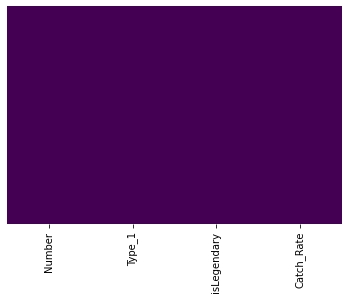

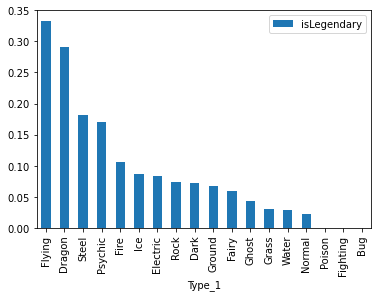

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

Poke = pd.read_csv(r'C:\Users\foxsq\OneDrive\Documents\ctu school stuff\Machine Learning\pokemon.csv')
#importing csv file for reading

Poke.info() #prints base info for dataset

#training for algorithm starts here

PTrain = Poke #setting up training portion
PTest = Poke #setting up testing portion.

PTrain.head(5) #prints training segment first 5 rows.

PTrain.describe(include = ['O']) #reads dataset including object values for display.

sns.heatmap(PTrain.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') #shows a heatmap pf missing values so we know which columns to drop.

PTrain.drop( columns = ['Type_2', 'Egg_Group_2', 'Pr_Male', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Color', 'hasGender', 'hasMegaEvolution', 'Egg_Group_1', 'Height_m', 'Weight_kg', 'Body_Style'], inplace = True) #drops unneeded columns

#PTrain['Type_2'] = PTrain['Type_2'].fillna('none') #fills values within column of type 2 with none instead of null values.

sns.heatmap(PTrain.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') #reprints heatmap to show changes

Plegend = PTrain[PTrain['isLegendary'] == 1]
PNotLegend = PTrain[PTrain['isLegendary'] == 0] #splits legendary rule into two segments for clarification

print('Legendary: %i (%.1f%%)' % (len(Plegend), float(len(Plegend))/len(PTrain)*100.0)) #shows percentage of legendary entries
print('Non Legendary: %i (%.1f%%)' % (len(PNotLegend), float(len(PNotLegend))/len(PTrain)*100.0)) #prints total non legendary entries
print('totals: %i'%len(PTrain)) #prints total entries in database

PTrain.columns #prints the remaining colums that will be used for the split.

type_1 = PTrain[['Type_1','isLegendary']].groupby(['Type_1'], as_index = False).mean().set_index('Type_1') #takes type_1 and compairs it to legendary column

type_1.sort_values(by = 'isLegendary',ascending = False).plot(kind = 'bar') #ssets the data as a bar plot

print(PTrain['Type_1'].unique()) #prints unique values in type 1 column

labels = LabelEncoder() #emables transform of text into numbers

PTrain.iloc[:,1] = labels.fit_transform(PTrain.iloc[:,1].values) #transforms uniques into numbers

print(PTrain['Type_1'].unique()) #prints transformed values

X = PTrain.iloc[: , 1:8] #splits data into 80%training
Y = PTrain.iloc[: , 0] #and 20 percent testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .6, random_state = 0) #actual split of data into testing and training

SD = StandardScaler() #scaled dataset
X_train = SD.fit_transform(X_train)
X_test = SD.transform(X_test)

Shiney = DecisionTreeClassifier() #decision tree for classification fits dataset best.
Shiney.fit(X_train, Y_train)
y_pred_decision_tree = Shiney.predict(X_test)
acc_decision_tree = round(Shiney.score(X_train, Y_train) * 100, 2)
print (acc_decision_tree) #decision tree logic.


this is for the final markdown and notes. legendary prediction is 46% accurite when fed the right data.